In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip "/content/drive/MyDrive/Circle.zip" -d "/content/"

In [ ]:
!cp -r '/content/drive/MyDrive/Aug_Meander' '/content/Aug_Meander'

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

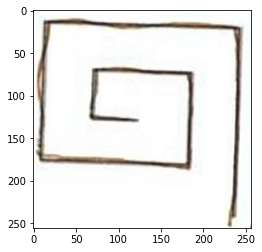

In [ ]:
data_path = '/content/Aug_Meander/Meander'
categories = ['Healthy', 'Patient']
for category in categories:
  path = os.path.join(data_path, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    new_array = cv2.resize(img_array, (256, 256))
    plt.imshow(new_array, cmap='gray')
    # plt.show()
    break
  break

In [ ]:
IMG_SIZE = 224

training_set = []

for category in categories:
  path = os.path.join(data_path, category)
  index = categories.index(category)
  for img in os.listdir(path):
    try:
      img_array = cv2.imread(os.path.join(path, img))
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      training_set.append([new_array, index])
    except Exception as e:
        pass


In [ ]:
import random
random.shuffle(training_set)

In [ ]:
X_train = []
y_train = []

for img_array, label in training_set:
  X_train.append(img_array)
  y_train.append(label)

In [ ]:
X_train =  np.array(X_train).reshape(-1,IMG_SIZE, IMG_SIZE, 3)
y_train = np.array(y_train)

In [ ]:
X_train = X_train/255.0

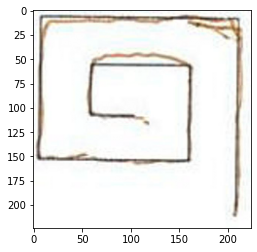

In [ ]:
plt.imshow(X_train[0], cmap='gray')

In [ ]:
X_train.shape

(1000, 224, 224, 3)

In [ ]:
y_train[:5]

array([0, 0, 1, 0, 0])

In [ ]:
# import pickle
# X = pickle.load(open('/content/drive/MyDrive/Potato_X.pickle', 'rb'))
# y = pickle.load(open('/content/drive/MyDrive/Potato_y.pickle', 'rb'))

In [ ]:
# X.shape

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.models import Sequential
import numpy as np
import pandas as pd

In [ ]:
vgg = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# y = y.reshape(4682, 1)

In [ ]:
# y.shape

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
model = Sequential()
for layer in vgg.layers:
  model.add(layer)

In [ ]:
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
X_train.shape

(1000, 224, 224, 3)

In [ ]:
pred = model.predict([X_train])

32/32 [==============================] - 15s 167ms/step


In [ ]:
pred.shape

(1000, 25088)

In [ ]:
y_train = y_train.reshape(1,1000)

In [ ]:
y_train = y_train.T

In [ ]:
y_train.shape

(1000, 1)

In [ ]:
pred = np.append(pred, y_train, axis=1)

In [ ]:
pred.shape

(1000, 25089)

In [ ]:
df = pd.DataFrame(np.array(pred))

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,25079,25080,25081,25082,25083,25084,25085,25086,25087,25088
0,0.703561,0.0,0.000000,0.0,0.000000,0.0,0.073633,0.0,0.0,0.0,...,0.251544,0.000000,0.027316,0.000000,0.799037,0.000000,0.0,0.508508,0.0,0.0
1,0.557845,0.0,0.000000,0.0,0.754300,0.0,0.000000,0.0,0.0,0.0,...,0.582224,0.311963,0.148653,0.000000,0.638263,0.588412,0.0,0.522219,0.0,0.0
2,0.524865,0.0,0.049466,0.0,1.081028,0.0,0.222742,0.0,0.0,0.0,...,0.625631,0.000000,0.051172,0.000000,0.025333,1.101109,0.0,0.049904,0.0,1.0
3,2.301474,0.0,0.000000,0.0,0.000000,0.0,0.311200,0.0,0.0,0.0,...,0.294579,0.082813,0.432858,0.000000,0.404976,0.551668,0.0,0.595920,0.0,0.0
4,0.081779,0.0,0.000000,0.0,0.180114,0.0,0.000000,0.0,0.0,0.0,...,0.303283,0.512411,0.000000,0.000000,0.801122,0.879302,0.0,0.400751,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.0,0.000000,0.0,1.022147,0.0,0.201359,0.0,0.0,0.0,...,0.859834,0.000000,0.000000,0.000000,0.000000,1.246561,0.0,0.045862,0.0,0.0
996,1.315279,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.080995,0.541692,1.042951,0.000000,0.035076,0.775381,0.0,0.823715,0.0,1.0
997,0.019421,0.0,0.000000,0.0,0.960473,0.0,0.283074,0.0,0.0,0.0,...,0.245938,0.616720,0.273016,0.413507,0.000000,0.348596,0.0,0.401352,0.0,1.0
998,0.353071,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.114415,0.130545,0.847406,0.000000,0.000000,0.908572,0.0,0.862196,0.0,1.0


In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
from xgboost import XGBClassifier
# fit model no training data
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[88 18]
 [ 6 88]]


0.88

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[98  8]
 [ 6 88]]


0.93

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[97  9]
 [48 46]]


0.715

In [ ]:
from sklearn import svm
classifier = svm.SVC()
classifier.fit(X_train, y_train)

SVC()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[88 18]
 [ 5 89]]


0.885

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[83 23]
 [ 5 89]]


0.86

In [ ]:
from lightgbm import LGBMClassifier
classifier = LGBMClassifier()
classifier.fit(X_train, y_train)


LGBMClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[88 18]
 [ 7 87]]


0.875